In [1]:
from lstm_using_chainer_with_fibonacci import *
from params import *
from chainer import serializers
import chainer
import numpy as np
import matplotlib.pyplot as plt 
import _pickle
from predict import *
%matplotlib inline

use cpu


In [2]:
PLOT_SIZE = 4 * SEQUENCE_SIZE

In [3]:
    # _/_/_/ モデルの読み込み

    mynet = MyNet(N_IN, N_HIDDEN, N_OUT)
    serializers.load_npz('chainer_mynet.npz', mynet)

    # _/_/_/ データの作成

    dataset = DatasetMaker.make(TOTAL_SIZE, VALUE)

    # _/_/_/ 予測

    output_seq = predict(mynet, dataset, SEQUENCE_SIZE)                      

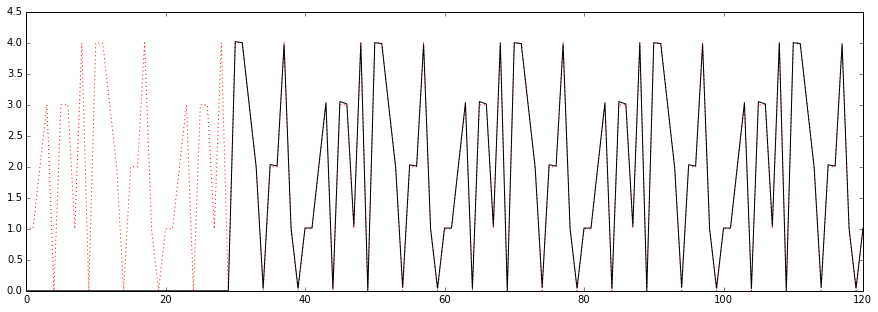

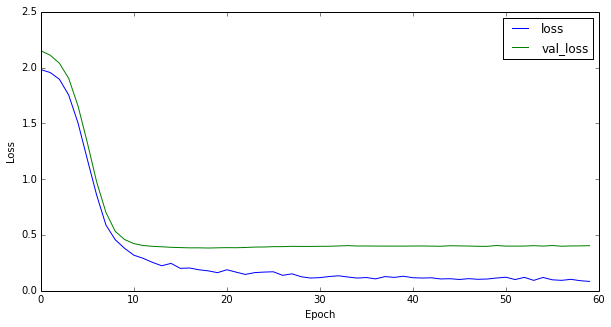

In [4]:
    # _/_/_/ 視覚化
    
    # 予測した時系列データ
    plt.figure(figsize=(15, 5))
    plt.xlim([0, PLOT_SIZE])
    plt.plot(dataset, linestyle='dotted', color='red')
    plt.plot(output_seq, color='black')
    plt.show()

    # 誤差とエポックの間の関係
    losses = _pickle.load(open('./chainer_losses.pkl', 'rb'))
    val_losses = _pickle.load(open('./chainer_val_losses.pkl', 'rb'))
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='loss')
    plt.plot(val_losses, label='val_loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
